In [52]:
%%capture
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
import pickle

# Text Pre-processing libraries
import nltk
import string
import warnings
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
 

In [53]:
# Load the dataset
df = pd.read_csv('dataset/hausa_hate.csv')


In [54]:
df.head()

,Hate words,Why Hate?,Offensive words,Why offensive?
0,Arna,discrimination based on religion,Yan bidi'a,insulting
1,Yahudawa,discrimination based on race,Akuya,comparison to animal
2,Yahudu,discrimination based on race,Jakai,comparison to animal
3,Kafirai,discrimination based on religion,Dabba,comparison to animal
4,Kafurai,discrimination based on religion,Karnuka,comparison to animal


In [55]:
df.columns

Index(['Hate words', 'Why Hate?', 'Offensive words', 'Why offensive?'], dtype='object')

In [56]:
def fill_na_with_mode(df, columns):
   
    for column in columns:
        if column in df.columns:
            mode_value = df[column].mode()[0]  # Get the mode of the column
            df[column].fillna(mode_value, inplace=True)  # Fill NaN values with the mode
    return df

In [57]:
# Apply the function to fill NaN values with the mode for specified columns
columns_to_fill = ['Hate words', 'Why Hate?', 'Offensive words', 'Why offensive?']
df = fill_na_with_mode(df, columns_to_fill)

print("\nDataFrame after filling NaN values with the mode:")
print(df)


DataFrame after filling NaN values with the mode:
    Hate words                         Why Hate? Offensive words  \
0         Arna  discrimination based on religion      Yan bidi'a   
1     Yahudawa      discrimination based on race           Akuya   
2       Yahudu      discrimination based on race           Jakai   
3      Kafirai  discrimination based on religion           Dabba   
4      Kafurai  discrimination based on religion         Karnuka   
..         ...                               ...             ...   
144      Aboki            discriminatory/neutral      Bagidajiya   
145      Aboki            discriminatory/neutral      Malalaciya   
146      Aboki            discriminatory/neutral      Marowaciya   
147      Aboki            discriminatory/neutral   Bakuwar haure   
148      Aboki            discriminatory/neutral        Yar baki   

           Why offensive?  
0               insulting  
1    comparison to animal  
2    comparison to animal  
3    comparison to a

In [58]:
# Combine 'Hate word' and 'Why Hate?' columns into one text column for hate speech
df['hate_text'] = df['Hate words']
df['offensive_text'] = df['Offensive words']

# Label the data: 1 for hate speech/offensive speech, 0 for non-hate/non-offensive speech
df['hate_label'] = 1
df['offensive_label'] = 1

In [59]:
df.columns

Index(['Hate words', 'Why Hate?', 'Offensive words', 'Why offensive?',
       'hate_text', 'offensive_text', 'hate_label', 'offensive_label'],
      dtype='object')

In [60]:
# Find the mode of the 'Hate words' column
hate_text_mode = df['hate_text'].mode()[0]
print("\nMost frequently occurring word (mode):", hate_text_mode)

# Fill NaN values with the mode
df['hate_text'].fillna(hate_text_mode, inplace=True)


Most frequently occurring word (mode): Aboki


In [61]:
# Lower case all the words of the hate_text before any preprocessing
df['hate_text'] = df['hate_text'].str.lower()

# Removing punctuations present in the text
# punctuations_list = string.punctuation
# def remove_punctuations(text):
# 	temp = str.maketrans('', '', punctuations_list)
# 	return text.translate(temp)

# df['hate_text']= df['hate_text'].apply(lambda x: remove_punctuations(x))
# df.head()

In [62]:
# Lower case all the words of the offensive_text before any preprocessing
df['offensive_text'] = df['offensive_text'].str.lower()

# Removing punctuations present in the text
punctuations_list = string.punctuation
# def remove_punctuations(text):
# 	temp = str.maketrans('', '', punctuations_list)
# 	return text.translate(temp)

# df['offensive_text']= df['offensive_text'].apply(lambda x: remove_punctuations(x))
# df.head()


In [63]:
# def remove_stopwords(text):
# 	stop_words = stopwords.words('english')

# 	imp_words = []

# 	# Storing the important words
# 	for word in str(text).split():

# 		if word not in stop_words:

# 			# Let's Lemmatize the word as well
# 			# before appending to the imp_words list.

# 			lemmatizer = WordNetLemmatizer()
# 			lemmatizer.lemmatize(word)

# 			imp_words.append(word)

# 	output = " ".join(imp_words)

# 	return output


# df['Hate words'] = df['Hate words'].apply(lambda text: remove_stopwords(text))
# df.head()

In [64]:
# def remove_stopwords(text):
# 	stop_words = stopwords.words('english')

# 	imp_words = []

# 	# Storing the important words
# 	for word in str(text).split():

# 		if word not in stop_words:

# 			# Let's Lemmatize the word as well
# 			# before appending to the imp_words list.

# 			lemmatizer = WordNetLemmatizer()
# 			lemmatizer.lemmatize(word)

# 			imp_words.append(word)

# 	output = " ".join(imp_words)

# 	return output


# df['tweet'] = df['tweet'].apply(lambda text: remove_stopwords(text))
# df.head()


In [65]:
df.columns

Index(['Hate words', 'Why Hate?', 'Offensive words', 'Why offensive?',
       'hate_text', 'offensive_text', 'hate_label', 'offensive_label'],
      dtype='object')

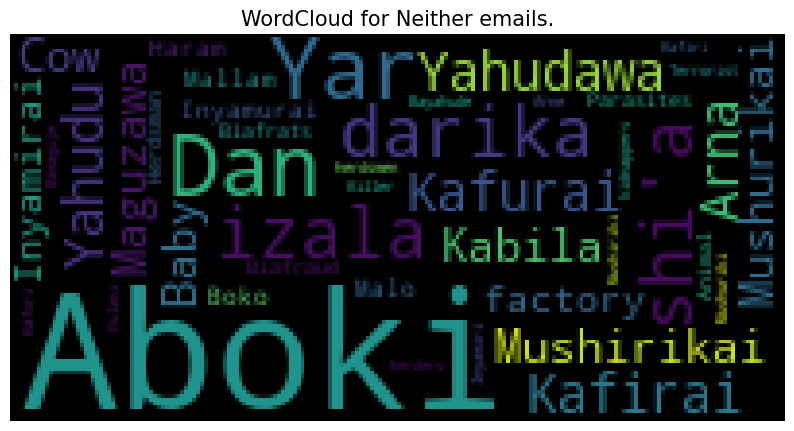

In [66]:
def plot_word_cloud(data, typ):
    # Joining all the tweets to get the corpus
    email_corpus = " ".join(data['Hate words'])
    
    plt.figure(figsize = (10,10))
    
    # Forming the word cloud
    wc = WordCloud(max_words = 100,
    				width = 200,
    				height = 100,
    				collocations = False).generate(email_corpus)
    
    # Plotting the wordcloud obtained above
    plt.title(f'WordCloud for {typ} emails.', fontsize = 15)
    plt.axis('off')
    plt.imshow(wc)
    plt.show()
    print()

plot_word_cloud(df[df['hate_label']==1], typ='Neither')


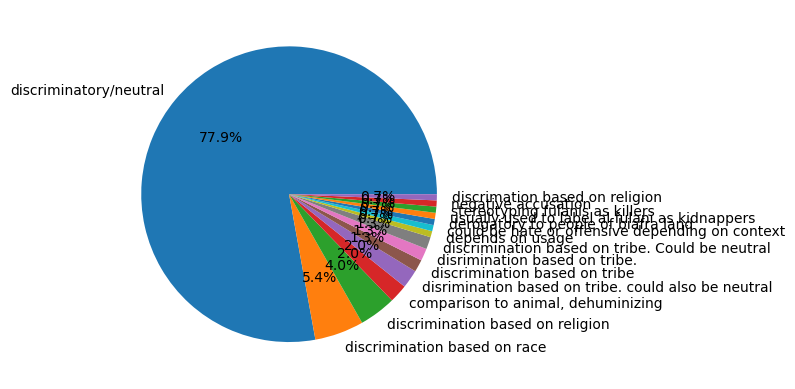

In [67]:
plt.pie(df['Why Hate?'].value_counts().values,
		labels = df['Why Hate?'].value_counts().index,
		autopct='%1.1f%%')
plt.show()


In [68]:
# Create a list of non-hate speech examples in Hausa
non_hate_speech = [
    "Wannan jimla ce ta yau da kullum.",
    "Babu maganganun ɓatanci a nan.",
    "Tatttaunawa ce ta yau da kullum.",
    "Yaya kake?",
    "Ina lafiya.",
    "Godiya ga Allah.",
    "Ina fatan kana da kyau.",
    "Allah ya albarkace ku.",
    "Zan zo gidan ku gobe.",
    "Ina son karanta wannan littafi.",
    "Ya kamata mu yi aiki tare.",
    "Daren yau yayi kyau sosai.",
    "Zan yi maka addu'a.",
    "Muna son zaman lafiya.",
    "Yaya iyalinka?",
    "Ina ganin wannan abu ya dace.",
    "Ku zo mu yi nishaɗi.",
    "Ina son jin ra'ayinka.",
    "Muna fatan alheri.",
    "Allah ya ba da zaman lafiya."
]

# Create a DataFrame for non-hate and non-offensive speech examples in Hausa
non_hate_df = pd.DataFrame({'hate_text': non_hate_speech, 'hate_label': 0, 'offensive_text': non_hate_speech, 'offensive_label': 0})

# Combine the datasets
combined_df = pd.concat([df[['hate_text', 'hate_label', 'offensive_text', 'offensive_label']], non_hate_df])

# Proceed with the rest of your machine learning pipeline


In [69]:
# Create a DataFrame for non-hate and non-offensive speech examples
non_hate_df = pd.DataFrame({'hate_text': non_hate_speech, 'hate_label': 0, 'offensive_text': non_hate_speech, 'offensive_label': 0})

# Combine the datasets
combined_df = pd.concat([df[['hate_text', 'hate_label', 'offensive_text', 'offensive_label']], non_hate_df])


In [70]:
import os

In [71]:
# Ensure the 'models' directory exists
os.makedirs('models', exist_ok=True)

# Split into features and labels for hate speech
X_hate = combined_df['hate_text']
y_hate = combined_df['hate_label']

# Split into features and labels for offensive speech
X_offensive = combined_df['offensive_text']
y_offensive = combined_df['offensive_label']

# Split the data into training and testing sets
X_hate_train, X_hate_test, y_hate_train, y_hate_test = train_test_split(X_hate, y_hate, test_size=0.3, random_state=42)
X_offensive_train, X_offensive_test, y_offensive_train, y_offensive_test = train_test_split(X_offensive, y_offensive, test_size=0.3, random_state=42)

# Initialize TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Transform the text data
X_hate_train_tfidf = tfidf_vectorizer.fit_transform(X_hate_train)
X_hate_test_tfidf = tfidf_vectorizer.transform(X_hate_test)
X_offensive_train_tfidf = tfidf_vectorizer.fit_transform(X_offensive_train)
X_offensive_test_tfidf = tfidf_vectorizer.transform(X_offensive_test)

# Define the models to be tested
models = {
    'hausa_LogisticRegression': LogisticRegression(),
    'hausa_DecisionTree': DecisionTreeClassifier(),
    'hausa_RandomForest': RandomForestClassifier(),
    'hausa_SVM': SVC(),
    'hausa_KNN': KNeighborsClassifier(),
    'hausa_NaiveBayes': MultinomialNB()
}



In [72]:
# Dictionary to store the accuracy of each model
model_accuracy = {}

# Function to train and evaluate models
def train_and_evaluate(models, X_train, y_train, X_test, y_test, task_name):
    for model_name, model in models.items():
        # Train the model
        model.fit(X_train, y_train)
        # Make predictions
        predictions = model.predict(X_test)
        # Calculate accuracy
        accuracy = accuracy_score(y_test, predictions)
        # Store the accuracy
        model_accuracy[f"{task_name} - {model_name}"] = accuracy
        # Save the model
        with open(f'models/{task_name}_{model_name}.pkl', 'wb') as f:
            pickle.dump(model, f)


In [73]:

# Train and evaluate models for hate speech detection
train_and_evaluate(models, X_hate_train_tfidf, y_hate_train, X_hate_test_tfidf, y_hate_test, 'hausa_hate_speech')

# Train and evaluate models for offensive speech detection
train_and_evaluate(models, X_offensive_train_tfidf, y_offensive_train, X_offensive_test_tfidf, y_offensive_test, 'hausa_offensive_speech')



In [74]:
# Save the models
def save_models(models, task_name):
    for model_name, model in models.items():
        model_file_path = f'models/{task_name}_{model_name}.pkl'
        with open(model_file_path, 'wb') as f:
            pickle.dump(model, f)
        print(f"Model saved: {model_file_path}")

# Save the hate speech detection models
save_models(models, 'hausa_hate_speech')

# Save the offensive speech detection models
save_models(models, 'hausa_offensive_speech')

Model saved: models/hausa_hate_speech_hausa_LogisticRegression.pkl
Model saved: models/hausa_hate_speech_hausa_DecisionTree.pkl
Model saved: models/hausa_hate_speech_hausa_RandomForest.pkl
Model saved: models/hausa_hate_speech_hausa_SVM.pkl
Model saved: models/hausa_hate_speech_hausa_KNN.pkl
Model saved: models/hausa_hate_speech_hausa_NaiveBayes.pkl
Model saved: models/hausa_offensive_speech_hausa_LogisticRegression.pkl
Model saved: models/hausa_offensive_speech_hausa_DecisionTree.pkl
Model saved: models/hausa_offensive_speech_hausa_RandomForest.pkl
Model saved: models/hausa_offensive_speech_hausa_SVM.pkl
Model saved: models/hausa_offensive_speech_hausa_KNN.pkl
Model saved: models/hausa_offensive_speech_hausa_NaiveBayes.pkl


In [75]:
# Print the accuracy of each model
for model_name, accuracy in model_accuracy.items():
    print(f"{model_name}: {accuracy:.4f}")

# Save the TfidfVectorizer
with open('models/hausa_tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(tfidf_vectorizer, f)

hausa_hate_speech - hausa_LogisticRegression: 0.9020
hausa_hate_speech - hausa_DecisionTree: 0.9412
hausa_hate_speech - hausa_RandomForest: 0.9020
hausa_hate_speech - hausa_SVM: 0.9020
hausa_hate_speech - hausa_KNN: 0.7059
hausa_hate_speech - hausa_NaiveBayes: 0.9020
hausa_offensive_speech - hausa_LogisticRegression: 0.9020
hausa_offensive_speech - hausa_DecisionTree: 0.9412
hausa_offensive_speech - hausa_RandomForest: 0.9020
hausa_offensive_speech - hausa_SVM: 0.9020
hausa_offensive_speech - hausa_KNN: 0.9804
hausa_offensive_speech - hausa_NaiveBayes: 0.9020


In [76]:
df.head()

,Hate words,Why Hate?,Offensive words,Why offensive?,hate_text,offensive_text,hate_label,offensive_label
0,Arna,discrimination based on religion,Yan bidi'a,insulting,arna,yan bidi'a,1,1
1,Yahudawa,discrimination based on race,Akuya,comparison to animal,yahudawa,akuya,1,1
2,Yahudu,discrimination based on race,Jakai,comparison to animal,yahudu,jakai,1,1
3,Kafirai,discrimination based on religion,Dabba,comparison to animal,kafirai,dabba,1,1
4,Kafurai,discrimination based on religion,Karnuka,comparison to animal,kafurai,karnuka,1,1
